# Create X and y sets

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

Plotting them

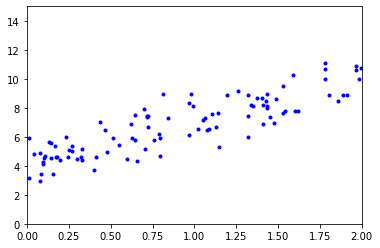

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.axis([0,2, 0, 15])
plt.show()

# Implement The Learning Algorithm

Theta has one 'weight' for every X in the row (so 1) as well as a bias. So we need to add an extra column of 1s into X for the matrix multipliaction

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b[0:5])

[[1.         0.46641219]
 [1.         0.97989973]
 [1.         0.27076769]
 [1.         1.85643805]
 [1.         0.01208387]]


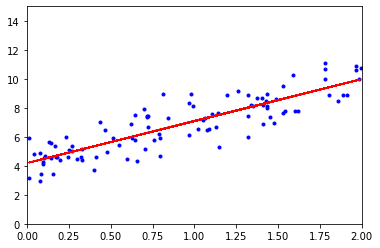

In [5]:
eta = 0.1 # Learning Rage
n_iterations = 1000
m = 100

# Randomly initialize theta for the linear regression
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot((X_b.dot(theta) - y))
    theta = theta - eta * gradients

plt.plot(X, y, "b.")
plt.plot(X, X_b.dot(theta), "r-")
plt.axis([0, 2, 0, 15])
plt.show()

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.
Epoch 0 MSE= 38.087162
Epoch 100 MSE= 0.94322336
Epoch 200 MSE= 0.9431447
Epoch 300 MSE= 0.94314474
Epoch 400 MSE= 0.94314474
Epoch 500 MSE= 0.94314474
Epoch 600 MSE= 0.94314474
Epoch 700 MSE= 0.94314474
Epoch 800 MSE= 0.94314474
Epoch 900 MSE= 0.94314474
[[4.188378 ]
 [2.8967743]]


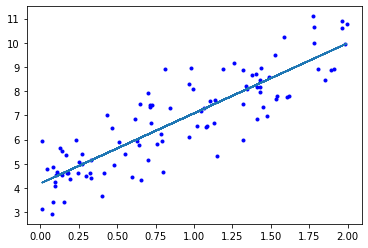

In [6]:
import tensorflow as tf
theta = np.random.randn(2, 1)
Xb = tf.constant(X_b, dtype=tf.float32, name="Xb")
yb = tf.constant(y, dtype=tf.float32, name="yb")
thetab = tf.Variable(theta, dtype=tf.float32, name="thetab")
y_predb = tf.matmul(Xb, thetab, name="predictionsb")
errorb = y_predb - yb
mseb = tf.reduce_mean(tf.square(errorb), name="mseb")
gradientsb = 2/m * tf.matmul(tf.transpose(Xb), errorb)

training_op = tf.assign(thetab, thetab - eta * gradientsb)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_iterations):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE=", mseb.eval())
        sess.run(training_op)
    
    best_thetab = thetab.eval()
    print(best_thetab)
    
    plt.plot(X, y, "b.")
    plt.plot(X, X_b.dot(best_thetab), )

# Now with Tensorflow

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
m, n = housing.data.shape

scaler = StandardScaler()
housing_data_scaled = scaler.fit_transform(housing.data)

housing_data_scaled_bias = np.c_[np.ones((m, 1)), housing_data_scaled]

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(housing_data_scaled_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
#gradients = 2/m * tf.matmul(tf.transpose(X), error)
# or using autodiff
# gradients = tf.gradients(mse, [theta])[0]
# Or using an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

# training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE = ", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE =  8.796017
Epoch 100 MSE =  0.6884283
Epoch 200 MSE =  0.57613385
Epoch 300 MSE =  0.56317127
Epoch 400 MSE =  0.5553498
Epoch 500 MSE =  0.5492939
Epoch 600 MSE =  0.5444988
Epoch 700 MSE =  0.5406795
Epoch 800 MSE =  0.5376239
Epoch 900 MSE =  0.5351691


In [8]:
best_theta

array([[ 2.0685525 ],
       [ 0.9099929 ],
       [ 0.14667045],
       [-0.39334592],
       [ 0.4008214 ],
       [ 0.00460958],
       [-0.04340155],
       [-0.6208851 ],
       [-0.5997322 ]], dtype=float32)

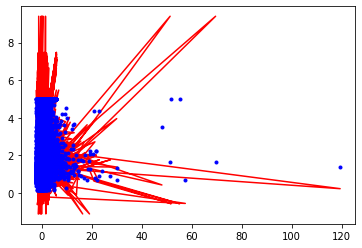

In [9]:
plt.plot(housing_data_scaled, housing_data_scaled_bias.dot(best_theta), "r-")
plt.plot(housing_data_scaled, housing.target, "b.")
plt.show()

# Now with mini-batch gradient descent using placeholders
placeholders need to be fed at runtime

trying


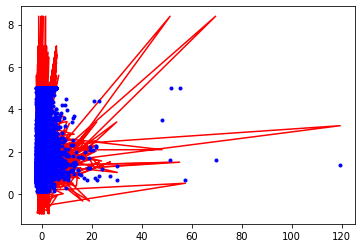

In [14]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = (None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape = (None, 1), name="y")
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

def fetch_batch(epoch, batch_index, batch_size):
    start_index = batch_index * batch_size
    end_index = start_index + batch_size
    X_batch = housing_data_scaled_bias[start_index:end_index]
    y_batch = housing.target.reshape(-1, 1)[start_index:end_index]
    return X_batch, y_batch

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, {X: X_batch, y: y_batch})
            
    best_theta = theta.eval()
    plt.plot(housing_data_scaled, housing_data_scaled_bias.dot(best_theta), 'r-')
    plt.plot(housing_data_scaled, housing.target, "b.")
    plt.show()